# Graded Lab Assignment: Logistic Regression (10 points)

### by Konrad Krawczyk


In [1]:
%pylab inline
import numpy as np


Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

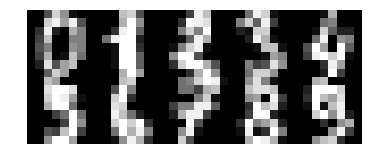

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))
#print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

X, y = digits.data[:1700,:], digits.target[:1700]
tX, ty = digits.data[1700:,:], digits.target[1700:]




## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [3]:
#Make a prediction function h
def prediction_function(x,theta):
    z = np.dot(theta.T, x) #theta transpose x, our general hypothesis
    g = 1/(1+np.exp(-z)) #function specific for logistic regression
    return g

In [4]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    result = y*(np.log(x_predict)) + (1-y)*np.log(1-x_predict)
    cost = -sum(result) / np.size(x_predict)
    return cost

In [5]:
#Create a function that returns the gradient values, given h (x_predict), y and x:

#Dimensions: 
#x_predict: 10,1; y: 10,1; x: 64,1
#The output has to be 64,10 - a matrix of gradients per each pixel per each number

def compute_gradient(x_predict, y, x):
    dtheta = outer((x_predict-y),x)
    grad = dtheta / np.size(x)
    return np.transpose(grad)

Training sample accuracy:
96.86666666666667
Test sample accuracy:
88.88888888888889


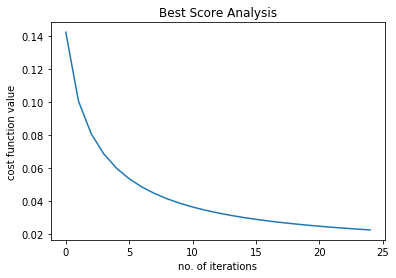

In [11]:
#Choose a suitable learning rate
alpha = 0.003
iterations = 25
theta = np.zeros((64,10))
stop = 0.00001
cost = 10

#It is important to check that you're not overfitting by testing your prediction on a testset

#Training data
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

#Test data
target = digits.target[:1500]
target_test = digits.target[1500:]

#THE LOOP:
A=[]
for i in range(iterations):
    for j in range(x.shape[0]):
        
        x_predict = prediction_function(x[j,:],theta)
        y = np.zeros(10)
        y[target[j]] = 1
        gradient = compute_gradient(x_predict, y, x[j, :])
        theta = theta - (alpha*gradient)
    A.append(cost_function(x_predict,y))


#The function that takes an input and classifies it as a certain digit based on pixel values.
def predictor(x, theta):
    return(argmax(prediction_function(np.transpose(x), theta)))

#Calculate the number of successful digit recognitions in the training set:

success = 0
for i in range(x.shape[0]):
    if predictor(x[i], theta) == target[i]:
        success += 1
    else:
        pass

print("Training sample accuracy:")
print((success/x.shape[0]) * 100)

#Calculate the number of successful digit recognitions in the testing set:

success_test = 0
for i in range(x_test.shape[0]):
    if predictor(x_test[i], theta) == target_test[i]:
        success_test += 1
    else:
        pass

print("Test sample accuracy:")
print((success_test/x_test.shape[0]) * 100)

plt.plot(A)
plt.title('Best Score Analysis')
plt.xlabel('no. of iterations')
plt.ylabel('cost function value')
plt.show()

### SUMMARY

This is a basic implementation of logistic regression for classifying images.
It takes 1797 samples of handwritten digits, and maps them onto an image matrix 8 by 8 pixels.
Based on expected values of brightness of these pixels, we can compare the image of a given sample of handwriting and, by comparing the values to the average values learned by the set, can recognize the digit that's most likely written on the sample.

This algorithm of course does not have 100% accuracy since handwriting styles differ by individual and the writing system of a given country. Also there are some numbers that are generally harder to recognize - for example 7.

Nevertheless, this is a framework that can be used for some perhaps more advanced applications in computer vision such as shape recognition, etc.

### OVERFIT PREVENTION

Since the success rates of prediction within both training and testing sets are similarly high (88% - 97%), we can safely assume that the hypothesis is effective enough in generalizing the score results. Therefore, no additional measures to prevent overfitting are necessary. 

### LEARNING RATE

After trying different rates of alpha, ***0.003*** turns out to be the most accurate one based on the testing set.

| Alpha | Training accuracy | Testing accuracy |
|---|---|---|
| 0.001 | 95.93 | 87.87 |
| ***0.003*** | ***96.86*** | ***88.88*** |
| 0.01 | 96.93 | 88.21 |
| 0.03 | 97.06 | 87.54 |
| 0.05 | 96.6 | 86.53 |
| 0.1 | 95.0 | 82.82 |
